In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
taxi_jan_2024 = pd.read_csv('//content/drive/MyDrive/Data Sceience/yellow-tripdata-2024-01-1.csv')
taxi_data = taxi_jan_2024

<ipython-input-3-0c1ba3d4563e>:1: DtypeWarning: Columns (3,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_jan_2024 = pd.read_csv('//content/drive/MyDrive/Data Sceience/yellow-tripdata-2024-01-1.csv')


In [ ]:
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55.000000,2024-01-01 01:17:43.000000,1,1.72,1,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00.000000,2024-01-01 00:09:36.000000,1,1.80,1,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06.000000,2024-01-01 00:35:01.000000,1,4.70,1,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38.000000,2024-01-01 00:44:56.000000,1,1.40,1,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51.000000,2024-01-01 00:52:57.000000,1,0.80,1,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [ ]:
taxi_data.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [ ]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55.000000,2024-01-01 01:17:43.000000,1,1.72,1,186,79,2,22.70
1,2024-01-01 00:03:00.000000,2024-01-01 00:09:36.000000,1,1.80,1,140,236,1,18.75
2,2024-01-01 00:17:06.000000,2024-01-01 00:35:01.000000,1,4.70,1,236,79,1,31.30
3,2024-01-01 00:36:38.000000,2024-01-01 00:44:56.000000,1,1.40,1,79,211,1,17.00
4,2024-01-01 00:46:51.000000,2024-01-01 00:52:57.000000,1,0.80,1,211,148,1,16.10


array([[<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >]], dtype=object)

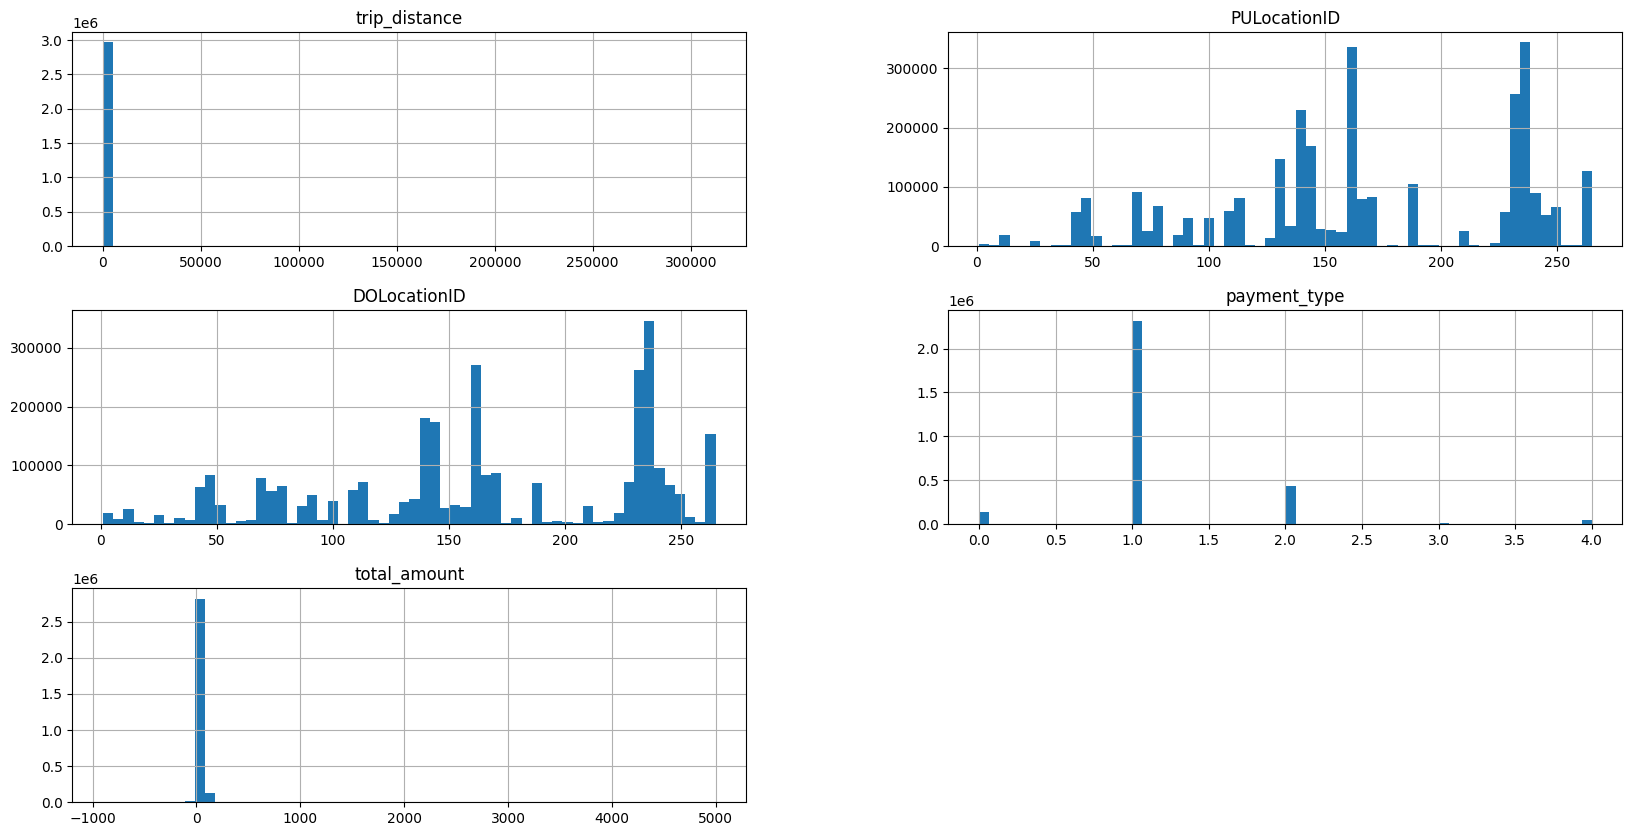

In [ ]:
taxi_data.hist(figsize=(20,10), bins=60)

In [ ]:
taxi_data['RatecodeID'].value_counts()

,count
RatecodeID,
1,2657230
\N,140162
2,98515
99,28662
5,19349
3,7944
4,6341
1,6120
2,198


<Axes: xlabel='index', ylabel='total_amount'>

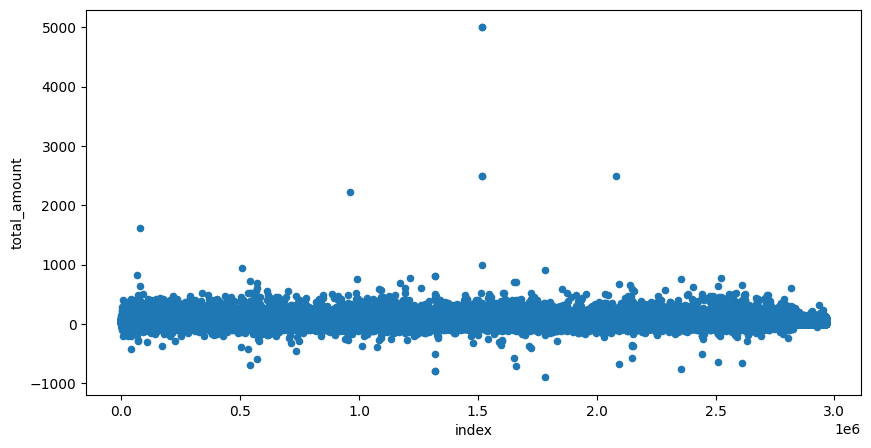

In [ ]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

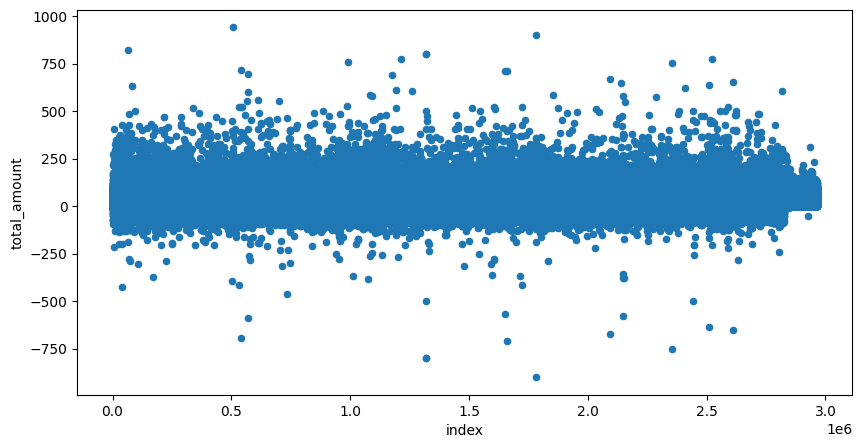

In [ ]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(35504, 9)


<Axes: xlabel='index', ylabel='total_amount'>

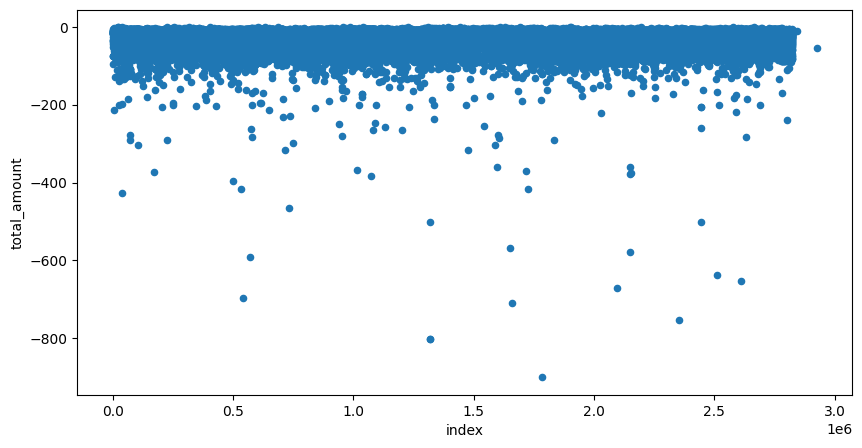

In [ ]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [ ]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24.000000,2024-01-01 00:30:39.000000,1,2.16,1,249,232,4,-18.50
506,2024-01-01 00:04:00.000000,2024-01-01 00:04:44.000000,1,0.01,5,63,63,2,-34.25
536,2024-01-01 00:41:42.000000,2024-01-01 00:46:00.000000,1,0.47,1,249,113,4,-10.80
552,2024-01-01 00:42:02.000000,2024-01-01 01:14:33.000000,1,5.48,1,107,61,2,-38.10
682,2024-01-01 00:24:02.000000,2024-01-01 01:10:32.000000,1,8.74,1,90,225,4,-52.80


In [ ]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

,count
payment_type,
4,21406
2,8326
3,5741
1,29
0,2


<Axes: >

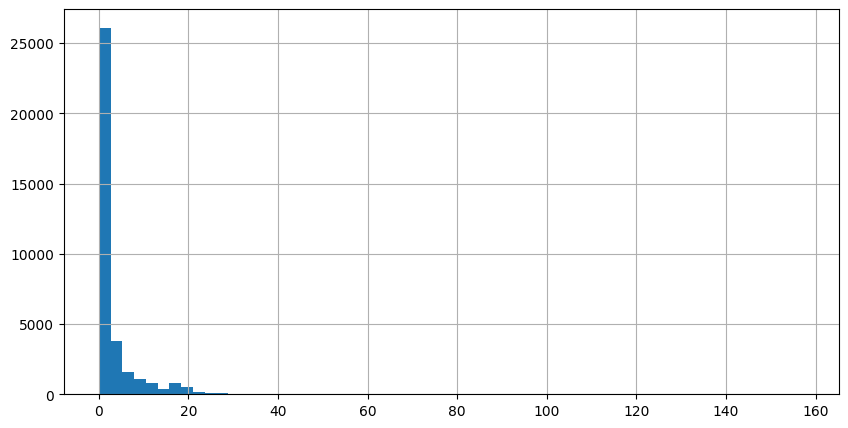

In [ ]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [ ]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42.000000,2024-01-01 00:28:49.000000,1,0.2,1,239,143,4,0.0
29224,2024-01-01 10:01:27.000000,2024-01-01 10:01:27.000000,1,0.0,5,239,264,2,0.0
39191,2024-01-01 13:46:41.000000,2024-01-01 14:12:06.000000,1,0.0,99,42,216,1,0.0
39591,2024-01-01 13:03:22.000000,2024-01-01 13:03:24.000000,1,0.0,1,264,264,2,0.0
39592,2024-01-01 13:05:28.000000,2024-01-01 13:05:35.000000,1,0.0,1,193,193,2,0.0


In [ ]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

,count
payment_type,
1,129
4,128
3,83
2,65
0,11


<Axes: >

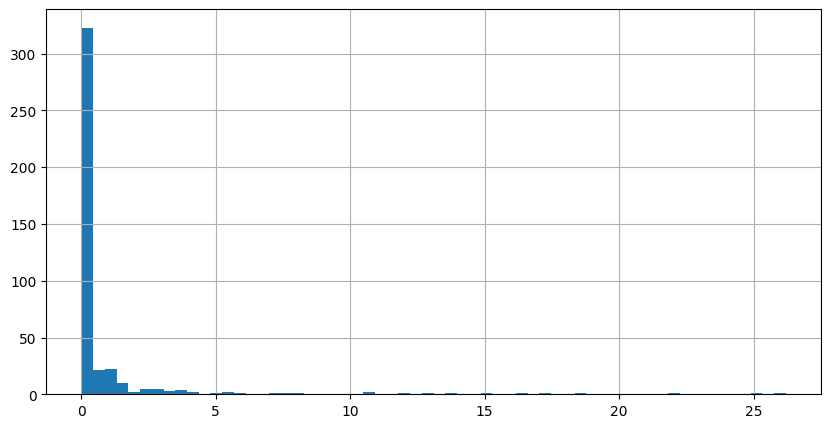

In [ ]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [ ]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

,count
trip_distance,
0.00,287
0.10,21
0.20,8
0.90,8
0.50,7
1.60,6
0.80,5
0.70,5
1.00,5


<Axes: xlabel='index', ylabel='total_amount'>

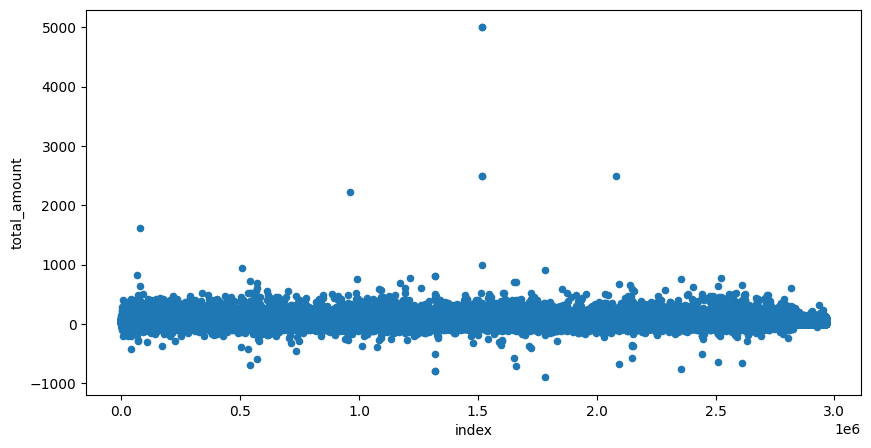

In [ ]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [ ]:
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [ ]:
taxi_data['total_amount'].mean()

np.float64(26.801504770925405)

In [ ]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [ ]:
print(taxi_data.shape)
taxi_data_filtered.shape

(2964624, 9)


(2927107, 9)

In [ ]:
taxi_data_filtered.isna().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0


In [ ]:
taxi_data_prepared = taxi_data_filtered.copy()

In [ ]:
taxi_data_prepared.dtypes

,0
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,object
trip_distance,float64
RatecodeID,object
PULocationID,int64
DOLocationID,int64
payment_type,int64
total_amount,float64


In [ ]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [ ]:
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

<ipython-input-29-b959c36d2508>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['186' '140' '236' ... '211' '107' '138']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
<ipython-input-29-b959c36d2508>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['79' '236' '79' ... '25' '13' '75']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
<ipython-input-29-b959c36d2508>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2' '1' '1' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatib

In [ ]:
taxi_data_prepared.head()
taxi_data_prepared.dtypes

,0
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,object
trip_distance,float64
RatecodeID,object
PULocationID,object
DOLocationID,object
payment_type,object
total_amount,float64


In [ ]:

taxi_data_prepared['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'])




taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
taxi_data_prepared['transaction_week_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.weekday
taxi_data_prepared['weekend'] = taxi_data_prepared['transaction_week_day'].apply(lambda x: x in [5, 6])



In [ ]:
taxi_data_prepared.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_week_day,weekend
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,186,79,2,22.70,2024,1,1,0,0,False
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1,140,236,1,18.75,2024,1,1,0,0,False
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1,236,79,1,31.30,2024,1,1,0,0,False
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1,79,211,1,17.00,2024,1,1,0,0,False
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1,211,148,1,16.10,2024,1,1,0,0,False


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>,
        <Axes: title={'center': 'transaction_week_day'}>, <Axes: >]],
      dtype=object)

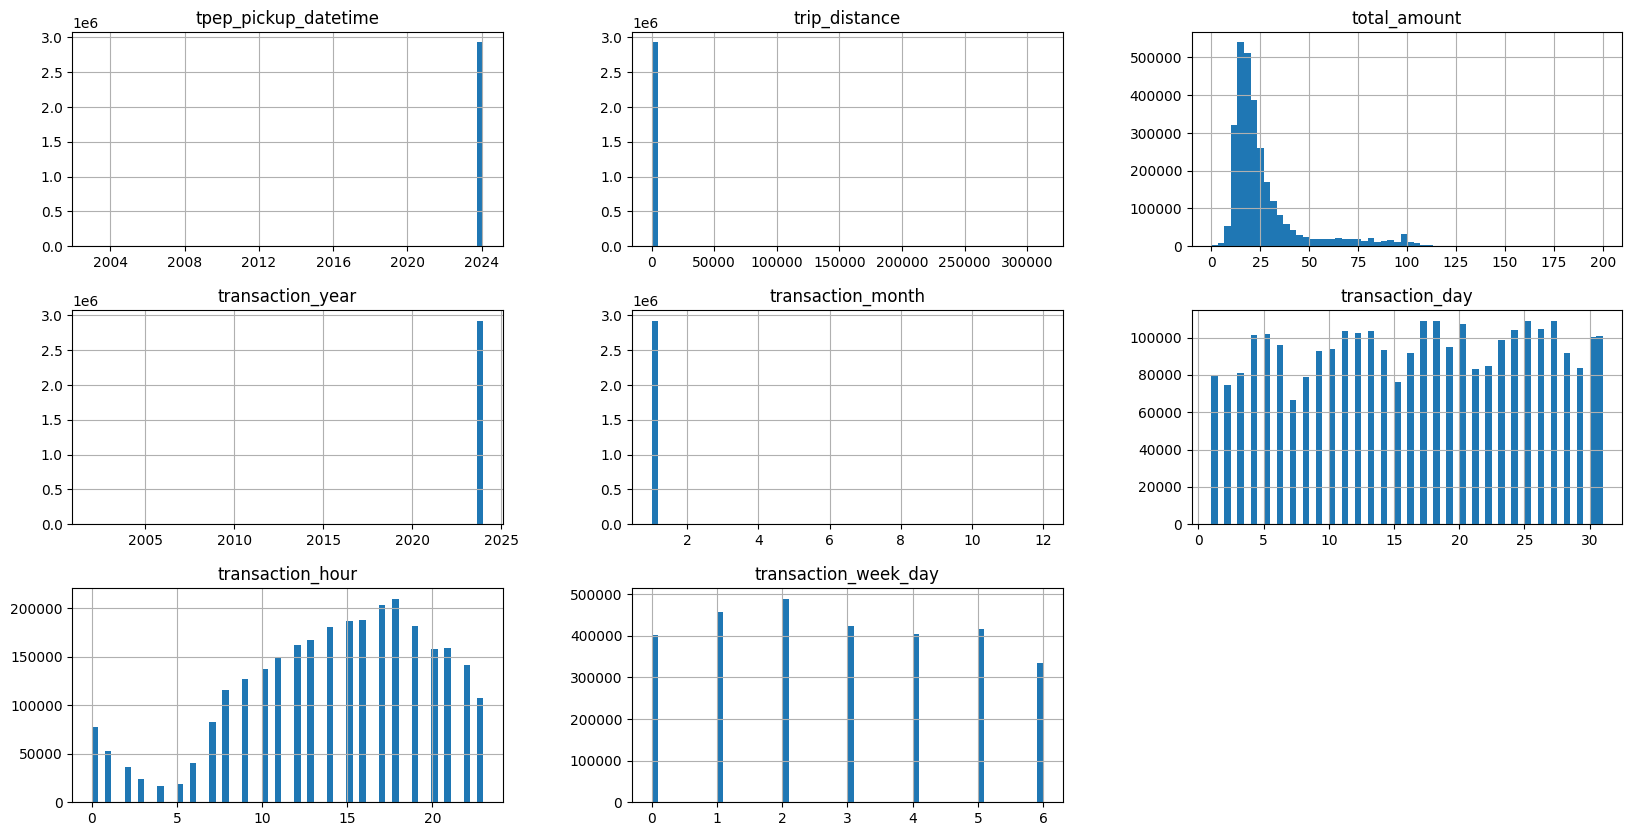

In [ ]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [ ]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime']).dt.date


In [ ]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2024]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [ ]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [ ]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2927090, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


In [ ]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(77432, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


<Axes: >

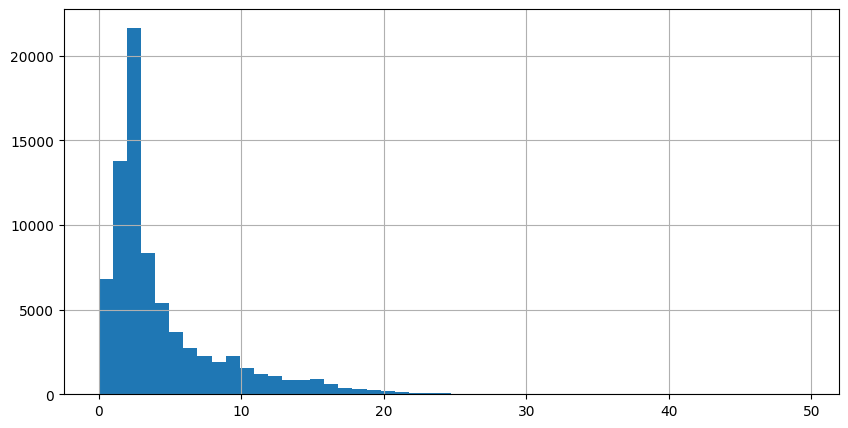

In [ ]:

filtered = taxi_grouped_by_region[taxi_grouped_by_region['trip_distance'] < 50]


filtered['trip_distance'].hist(bins=50, figsize=(10, 5))


<Axes: >

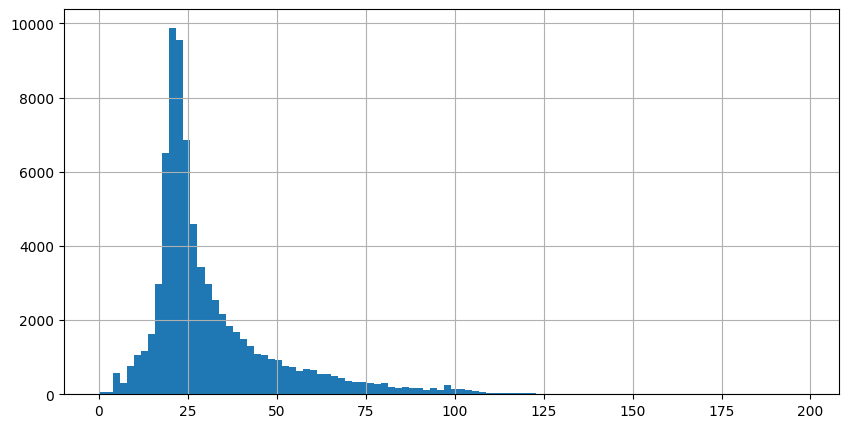

In [ ]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

Benchmark model

In [ ]:
data_for_benchmark_model = taxi_grouped_by_region.copy()


In [ ]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2
...,...,...,...,...,...,...,...,...
77427,98,2024-01-30,1,30,5,14.600000,60.970000,2
77428,98,2024-01-31,1,31,5,12.500000,51.000000,1
77429,98,2024-01-31,1,31,10,17.100000,67.940000,1
77430,98,2024-01-31,1,31,12,0.600000,10.100000,1


In [ ]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]


X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

Fit a model to the data


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

**Model** **evaluation**

In [ ]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 6.412500362570313
mean_squared_error 154.55217388654776
root_mean_squared_error 12.431901459010515
r2 0.5849176137134828


<Axes: xlabel='true', ylabel='pred'>

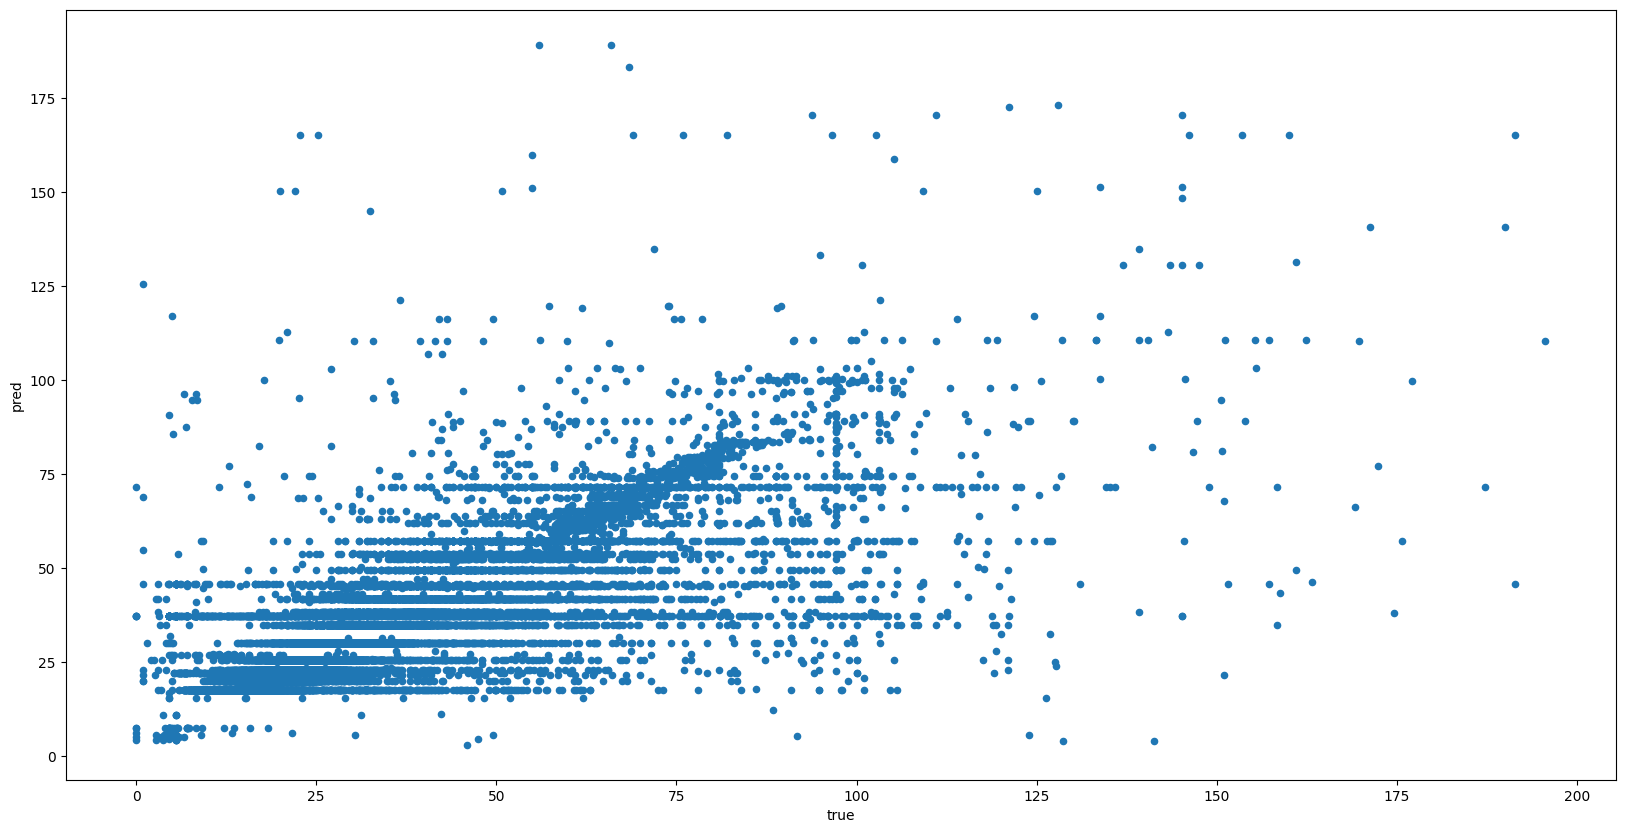

In [ ]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

Fix problems

In [ ]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'


from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)


model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 11.438475633544257
mean_squared_error 283.3831619962675
root_mean_squared_error 16.83398829737824
r2 0.2389148844895821


<Axes: xlabel='true', ylabel='pred'>

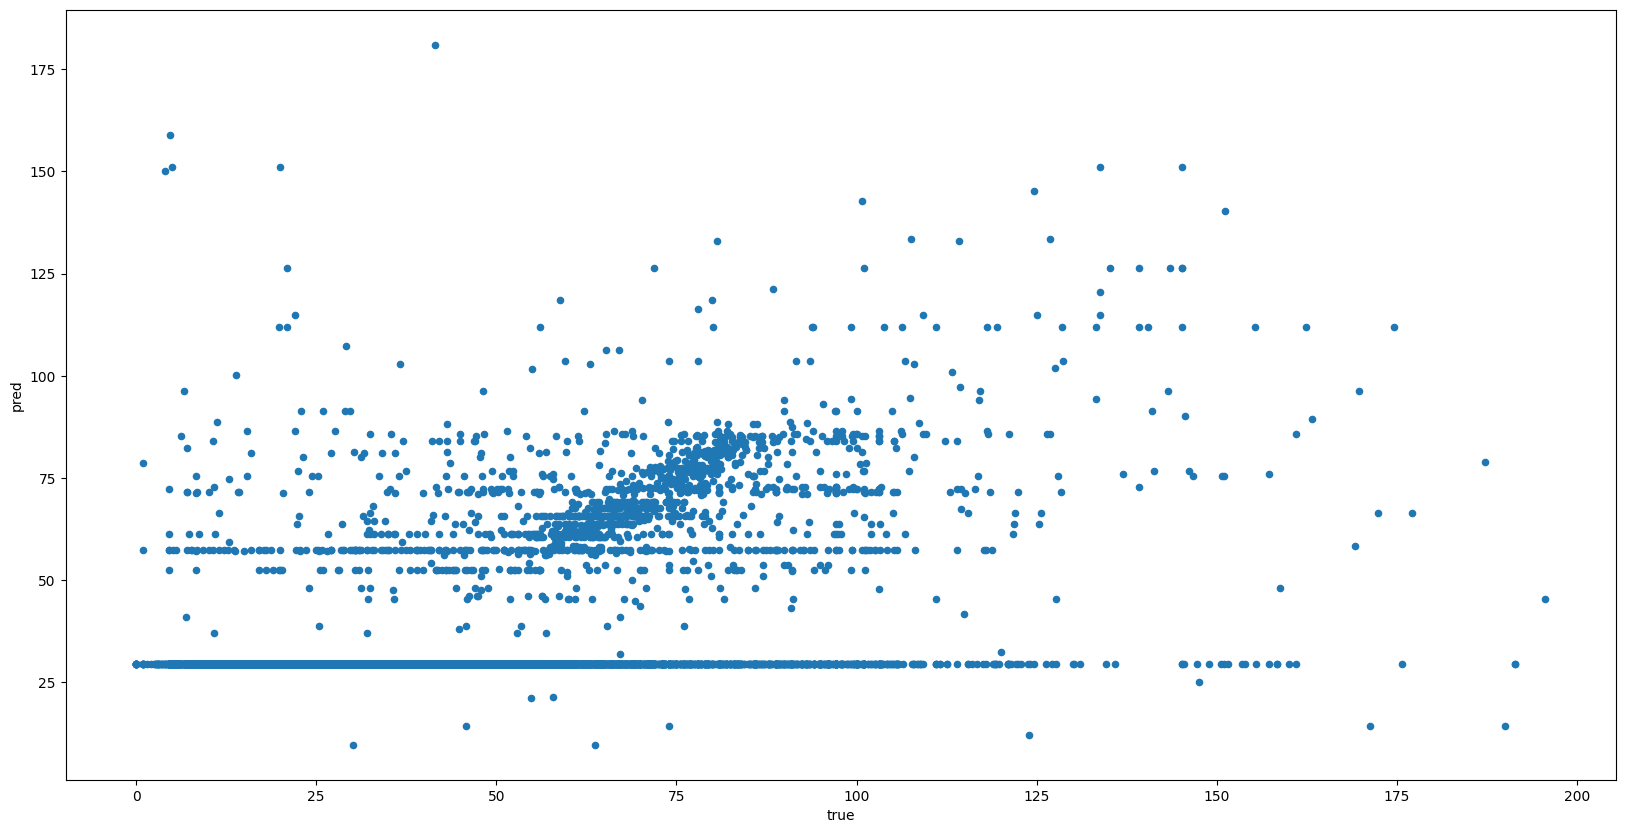

In [ ]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

 Feature engineering

In [ ]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [ ]:
data_with_new_features = taxi_grouped_by_region.copy()

Date-related features

In [ ]:
data_with_new_features['transaction_date'] = pd.to_datetime(data_with_new_features['transaction_date'])


In [ ]:

data_with_new_features['transaction_date'] = pd.to_datetime(data_with_new_features['transaction_date'])


data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: x in [5, 6])


In [ ]:
print(data_with_new_features['transaction_date'].dtype)


datetime64[ns]


In [ ]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday


In [ ]:
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

<ipython-input-57-b493d110887a>:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [ ]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False


Borough information



In [ ]:
zone_lookup = pd.read_csv('/content/drive/MyDrive/Data Sceience/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [ ]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR


In [ ]:
data_with_new_features['Borough'].value_counts()


,count
Borough,
Manhattan,42075
Queens,14978
Brooklyn,13558
Bronx,5283
Unknown,722
EWR,181
Staten Island,68


Weather related features



In [ ]:
nyc_weather = pd.read_csv('/content/drive/MyDrive/Data Sceience/nyc_weather_2024_realistic.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,01.01.2024 00:00,17.0,56,3,25%,0.3
1,01.01.2024 03:00,10.6,45,11,100%,NaN
2,01.01.2024 06:00,18.5,58,19,50%,14.0
3,01.01.2024 09:00,27.2,95,14,0%,NaN
4,01.01.2024 12:00,9.7,77,15,0%,NaN


In [ ]:
nyc_weather.shape


(2928, 6)

In [ ]:
nyc_weather.dtypes


,0
date and time,object
temperature,float64
humidity,int64
wind speed,int64
cloud cover,object
amount of precipitation,object


In [ ]:
nyc_weather['cloud cover'].value_counts()


,count
cloud cover,
100%,638
70 – 80%,588
25%,573
50%,567
0%,562


In [ ]:
nyc_weather['amount of precipitation'].value_counts()


,count
amount of precipitation,
Trace of precipitation,267
0.3,131
2.0,118
0.5,92
0.8,89
1.0,86
4.0,73
5.0,59
3.0,51


In [ ]:
nyc_weather.isna().sum()


,0
date and time,0
temperature,0
humidity,0
wind speed,0
cloud cover,0
amount of precipitation,1740


In [ ]:

nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(str).str.strip().str.replace('%', '', regex=False)


nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace({
    '70 – 80': 0.75,
    '20–30': 0.25,
    'no clouds': 0,
    'Sky obscured by fog and/or other meteorological phenomena.': 1
})


nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float) / 100


nyc_weather['cloud cover'].interpolate(inplace=True)


<ipython-input-68-b6410b92abeb>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['cloud cover'].interpolate(inplace=True)


In [ ]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('25%', 0.25)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%', 1.0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%', 0.5)



In [ ]:
nyc_weather.dtypes


,0
date and time,object
temperature,float64
humidity,int64
wind speed,int64
cloud cover,float64
amount of precipitation,object


In [ ]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'], dayfirst=True)
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day


In [ ]:
nyc_weather.head()


,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2024-01-01 00:00:00,17.0,56,3,0.25,0.3,0,1,1
1,2024-01-01 03:00:00,10.6,45,11,1.00,NaN,3,1,1
2,2024-01-01 06:00:00,18.5,58,19,0.50,14.0,6,1,1
3,2024-01-01 09:00:00,27.2,95,14,0.00,NaN,9,1,1
4,2024-01-01 12:00:00,9.7,77,15,0.00,NaN,12,1,1


In [ ]:
data_with_new_features.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR


In [ ]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(77432, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,...,EWR,2024-01-01 06:00:00,18.5,58.0,19.0,0.5000,14.0,6.0,1.0,1.0
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,...,EWR,2024-01-01 15:00:00,9.7,67.0,4.0,0.0075,NaN,15.0,1.0,1.0


In [ ]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)


In [ ]:
nyc_taxi_with_weather.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR,18.5,58.0,19.0,0.5000,14.0
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR,9.7,67.0,4.0,0.0075,NaN


In [ ]:
nyc_taxi_with_weather.isna().sum()


,0
PULocationID,0
transaction_date,0
transaction_month,0
transaction_day,0
transaction_hour,0
trip_distance,0
total_amount,0
count_of_transactions,0
transaction_week_day,0
weekend,0


In [ ]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)


In [ ]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

<ipython-input-79-dfe54683d944>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
<ipython-input-79-dfe54683d944>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


,0
PULocationID,0
transaction_date,0
transaction_month,0
transaction_day,0
transaction_hour,0
trip_distance,0
total_amount,0
count_of_transactions,0
transaction_week_day,0
weekend,0


In [ ]:
nyc_taxi_with_weather.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2024-01-01,1,1,0,4.810000,40.748333,6,0,False,False,Queens,17.0,56.0,3.0,0.25,0.3
1,100,2024-01-01,1,1,0,1.611111,24.853333,9,0,False,False,Manhattan,17.0,56.0,3.0,0.25,0.3
2,101,2024-01-01,1,1,0,11.320000,51.580000,1,0,False,False,Queens,17.0,56.0,3.0,0.25,0.3
3,102,2024-01-01,1,1,0,5.150000,23.270000,1,0,False,False,Queens,17.0,56.0,3.0,0.25,0.3
4,107,2024-01-01,1,1,0,1.988056,22.900556,180,0,False,False,Manhattan,17.0,56.0,3.0,0.25,0.3


In [ ]:
nyc_taxi_with_weather.isna().sum()


,0
PULocationID,0
transaction_date,0
transaction_month,0
transaction_day,0
transaction_hour,0
trip_distance,0
total_amount,0
count_of_transactions,0
transaction_week_day,0
weekend,0


In [ ]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)


In [ ]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

<ipython-input-83-dfe54683d944>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
<ipython-input-83-dfe54683d944>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


,0
PULocationID,0
transaction_date,0
transaction_month,0
transaction_day,0
transaction_hour,0
trip_distance,0
total_amount,0
count_of_transactions,0
transaction_week_day,0
weekend,0


In [ ]:
data_for_model = nyc_taxi_with_weather.copy()


In [ ]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

train-test split


In [ ]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]


X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

7.1. Decision tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 10.03090244842022
mean_squared_error 264.78700649539854
root_mean_squared_error 16.27227723754111
r2 0.2969067596236049


<Axes: xlabel='true', ylabel='pred'>

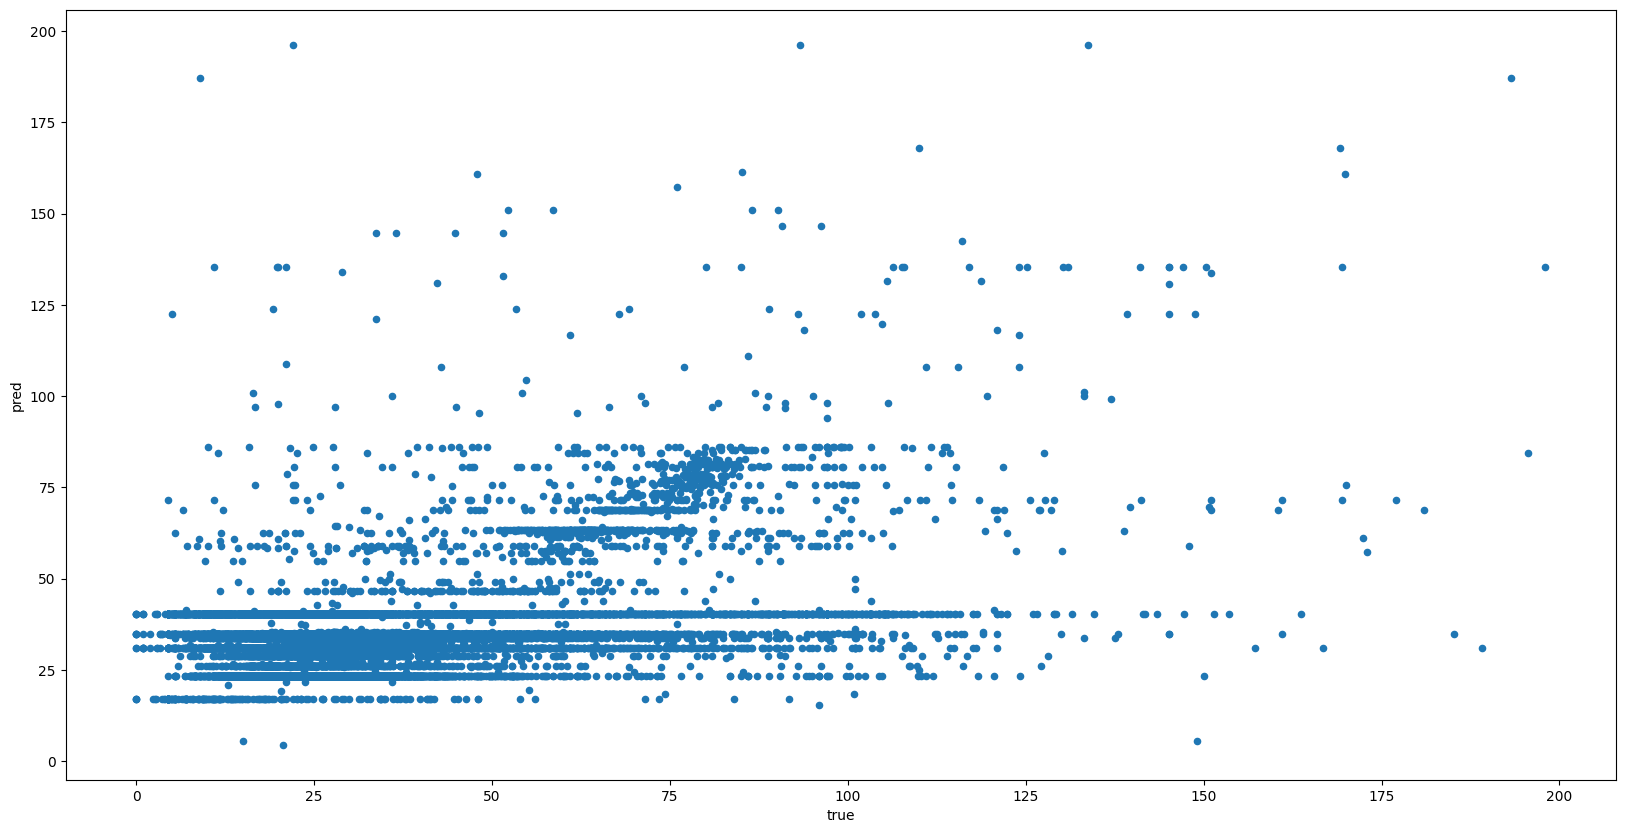

In [ ]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


Overfit
The model fits the training data's pattern so much that it loses the ability to generalise.

In [ ]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [ ]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree_overfit

    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))

    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))

    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [ ]:
pd.DataFrame.from_dict(rmse_scores)


,max_depth,rmse_train,rmse_test
0,2,17.767822,17.675129
1,5,16.549829,16.701712
2,8,15.775414,16.357896
3,10,15.237009,16.243847
4,15,13.922369,16.398743
5,20,12.636842,17.024674
6,30,10.093942,18.416001
7,50,4.858899,20.033164
8,70,1.140030,20.664086
9,100,0.047123,20.763521


Text(0, 0.5, 'root mean squared error')

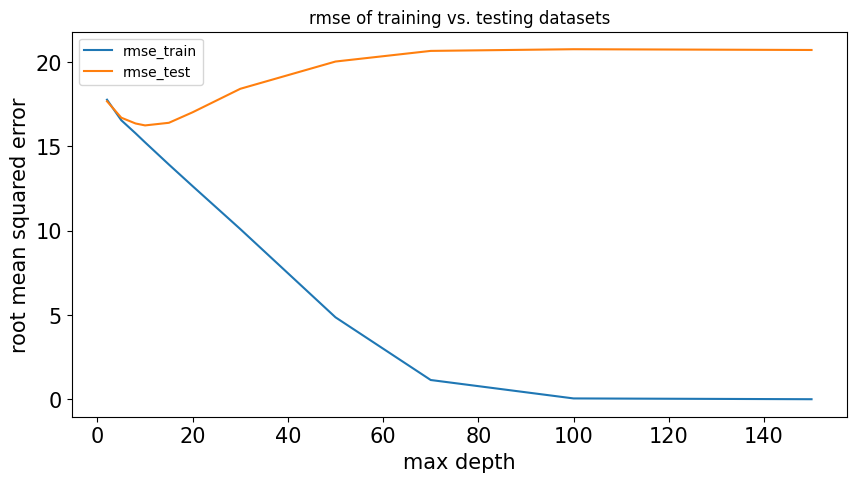

In [ ]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

Underfit
Underfit is when the model cannot capture the data's pattern at all

In [ ]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [ ]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)



model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 11.803726505966315
mean_squared_error 331.31685840519543
root_mean_squared_error 18.202111372178653
r2 0.13394727652492333


In [ ]:


y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 11.78962159402145
mean_squared_error 326.4855694463245
root_mean_squared_error 18.068911684059017
r2 0.13307756299538054


7.2. Random forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.2409975983653
mean_squared_error 241.94466940676048
root_mean_squared_error 15.554570691817903
r2 0.35756038841750704


<Axes: xlabel='true', ylabel='pred'>

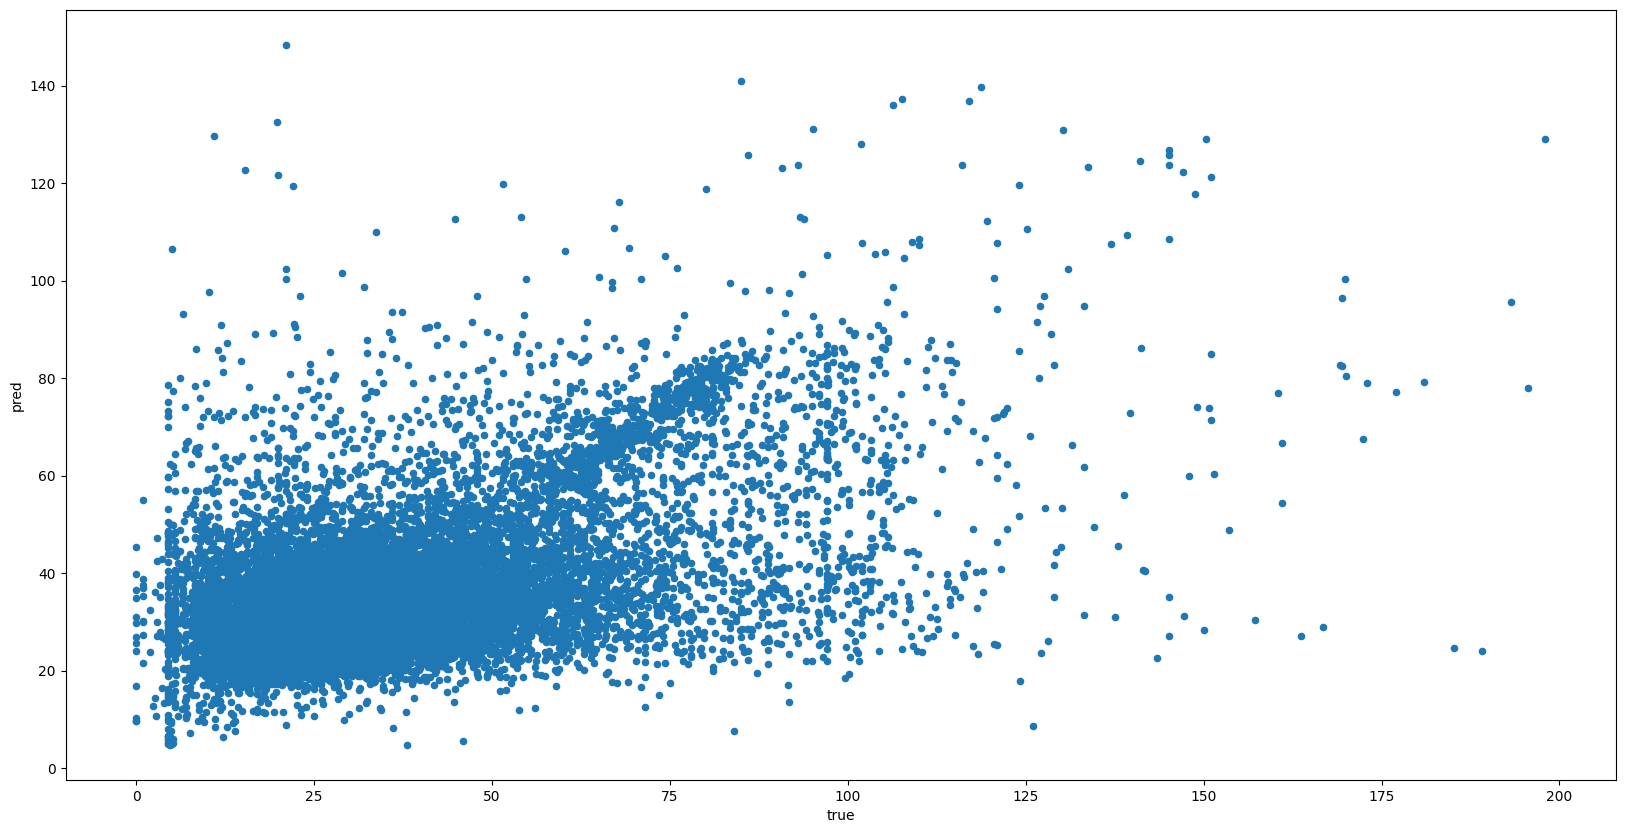

In [ ]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

7.3. Gradient boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.979377395309593
mean_squared_error 243.40069323246453
root_mean_squared_error 15.60130421575275
r2 0.3536941846969053


<Axes: xlabel='true', ylabel='pred'>

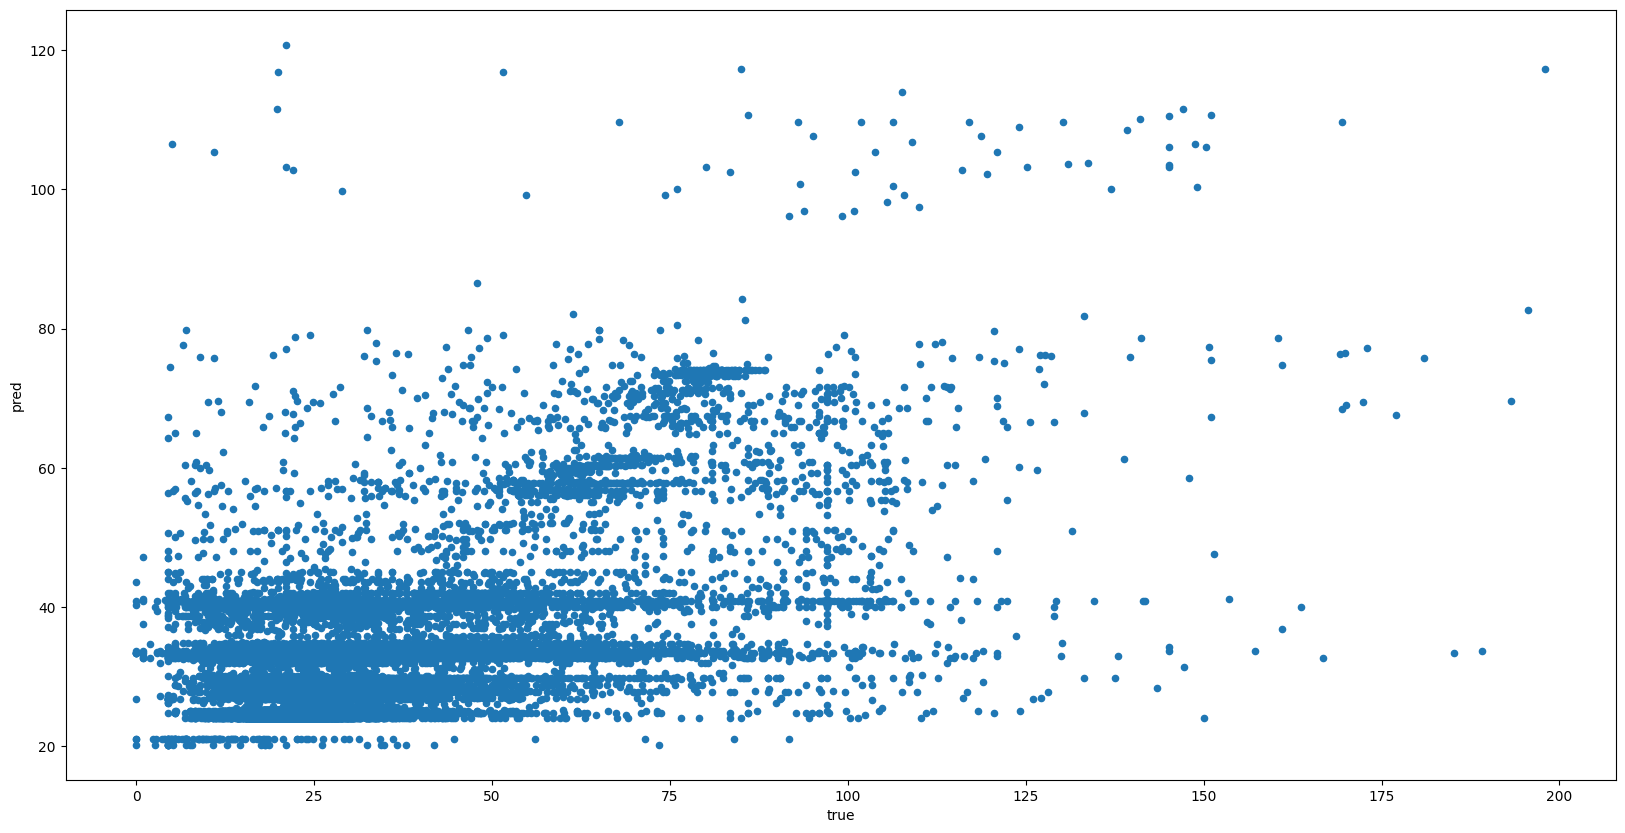

In [ ]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

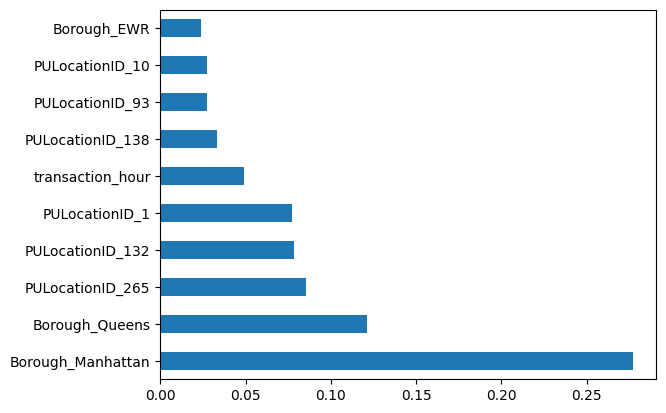

In [ ]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

8. Tuning


8.1. Find best parameters

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)

min_samples_split = [2, 5, 10, 20, 40]

min_samples_leaf = [1, 2, 4, 10, 20]

bootstrap = [True, False]

In [ ]:
import pprint as pp


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)


rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line

In [ ]:
performances


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,56.416365,2.288611,2.740793,0.055200,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.393921,0.397891,0.392389,0.394734,0.002319,2
1,16.815970,0.366234,0.554180,0.025203,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.352083,0.348378,0.360429,0.353630,0.005040,6
2,22.602973,0.446526,0.619196,0.101638,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.355282,0.350873,0.360763,0.355639,0.004046,5
3,0.030957,0.000270,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.031843,0.002827,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,380.564403,11.898742,18.660522,1.405896,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.384554,0.387009,0.380766,0.384109,0.002568,4
6,60.162123,0.269389,1.756103,0.071434,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.277938,0.269908,0.284389,0.277411,0.005924,7
7,174.047359,3.511414,6.486524,0.658489,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.382904,0.382140,0.390278,0.385107,0.003669,3
8,0.053764,0.006241,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,120.409949,24.982643,5.092404,1.100384,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.403855,0.406603,0.406623,0.405693,0.001300,1


In [ ]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  251.96282172203064  seconds
mean_absolute_error 9.27222202935357
mean_squared_error 228.6702277211605
root_mean_squared_error 15.12184604210612
r2 0.39280822909687274


In [ ]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  37.746073722839355  seconds
mean_absolute_error 9.174065932499444
mean_squared_error 226.2714507606421
root_mean_squared_error 15.042321987001943
r2 0.3991777405333806


<Axes: xlabel='true', ylabel='pred'>

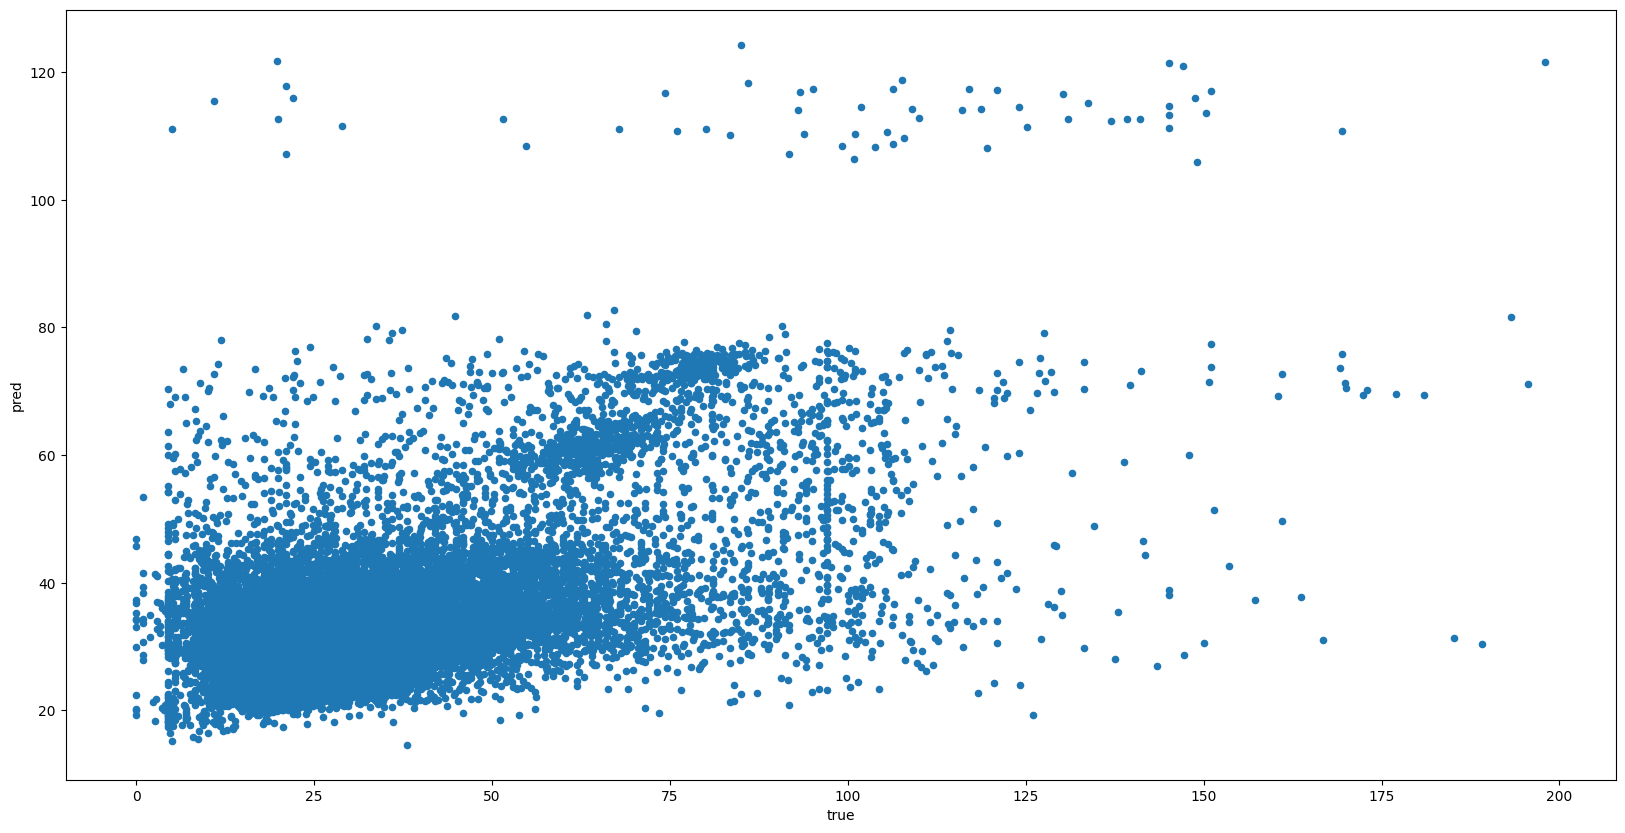

In [ ]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

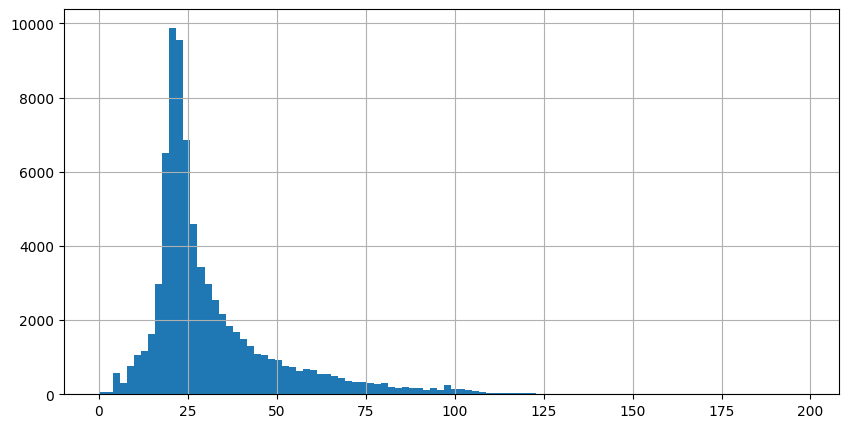

In [ ]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))


In [ ]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2024-01-01,1,1,0,4.810000,40.748333,6,0,False,False,Queens,17.0,56.0,3.0,0.25,0.3,high,1
1,100,2024-01-01,1,1,0,1.611111,24.853333,9,0,False,False,Manhattan,17.0,56.0,3.0,0.25,0.3,high,1
2,101,2024-01-01,1,1,0,11.320000,51.580000,1,0,False,False,Queens,17.0,56.0,3.0,0.25,0.3,high,1
3,102,2024-01-01,1,1,0,5.150000,23.270000,1,0,False,False,Queens,17.0,56.0,3.0,0.25,0.3,high,1
4,107,2024-01-01,1,1,0,1.988056,22.900556,180,0,False,False,Manhattan,17.0,56.0,3.0,0.25,0.3,high,1


In [ ]:
nyc_class['earning_class'].value_counts()


,count
earning_class,
high,72492
low,4940


In [ ]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'

In [ ]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]


X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[  110  1531]
 [  120 23792]]
accuracy 0.9353891910930223
precision 0.9395411286182522
recall 0.9949815991970559


<Axes: >

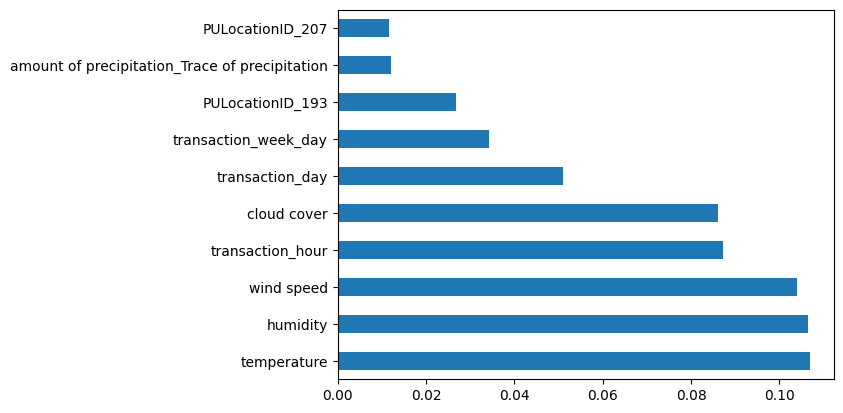

In [ ]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))